# Guía 4: Números aleatorios

## Introducción

Para generar números aleatorios podemos usar `NumPy`.

In [1]:
import numpy as np

Por ejemplo, la siguiente línea de código nos devuelve un número aleatorio uniformemente distribuído entre 0 y 1.

In [2]:
np.random.rand()

0.16209587064450037

Podemos fijarle la semilla para que siempre nos devuelva el mismo número

In [3]:
np.random.seed(seed=1234)
np.random.rand()

0.1915194503788923

La siguiente celda con código genera una distribución aleatoria de 100000 elementos que luego son graficados en un histograma para verificar que la distribución es uniforme.

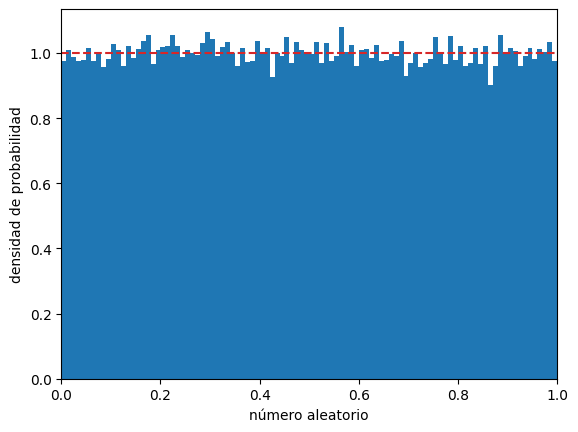

In [4]:
import matplotlib.pyplot as plt

np.random.seed(seed=192857)
rand_values = np.random.rand(100000)

# grafica un histograma de 100 bins  y chequeamos que da 1
plt.hist(rand_values, bins=100, density=True)
plt.plot([0, 1], [1, 1], color="tab:red", linestyle="dashed")
plt.xlim((0.0, 1.0))

plt.ylabel("densidad de probabilidad")
plt.xlabel("número aleatorio")
plt.show()

## Ejercicios de programación

1. Escriba un código para generar números aleatorios exponencialmente distribuidos en el intervalor $[0, \infty)$, a partir de variables aleatorias uniformemente distribuidas en el intervalo $[0, 1)$ (ver celda de código de jemplo arriba). Para comprobar que los números generados obedecen la distribución buscada, realizar un histograma.

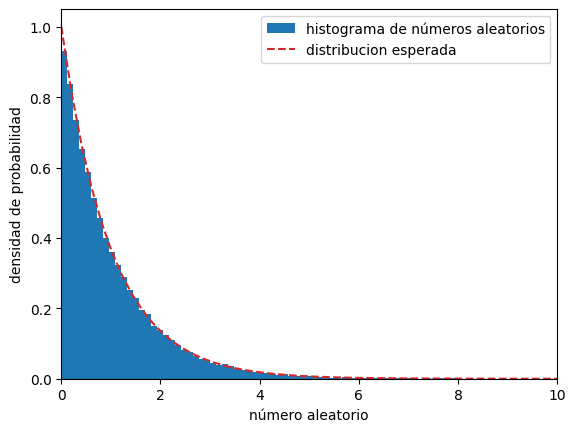

In [5]:
rand_values = - np.log(1 - np.random.rand(100000))

plt.hist(rand_values, bins=100, density=True, label="histograma de números aleatorios")

xvals = np.linspace(0, 10)
yvals = np.exp(-xvals)
plt.plot(xvals, yvals, color="tab:red", linestyle="dashed", label="distribucion esperada")
plt.xlim((0.0, 10.0))

plt.ylabel("densidad de probabilidad")
plt.xlabel("número aleatorio")
plt.legend()
plt.show()

2. Escriba un código para evaluar la integral $$\int_0^1 \frac{1}{1 + x^2} dx$$ con el método de Monte Carlo y usando un muestreo uniforme.

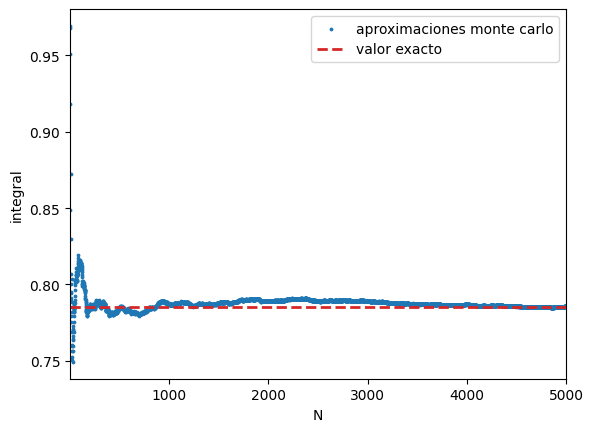

In [6]:
exacta = np.arctan(1)

nsteps = 5000

mc_steps = np.arange(1, nsteps)

mc = 0
aproximaciones = []
for step in mc_steps:
    mc += 1 / (1 + np.random.rand()**2)
    aproximaciones.append(mc / step)
    
plt.scatter(mc_steps, aproximaciones, s=3, label="aproximaciones monte carlo")
plt.axhline(y=exacta, xmin=0, xmax=nsteps, color="tab:red", linewidth=2, linestyle="dashed", label="valor exacto")

plt.xlim((1, 5000))

plt.xlabel("N")
plt.ylabel("integral")
plt.legend()
plt.show()

3. Comparar el resultado obtenido en el ejercicio anterior a través de un muestreo de importancia, utilizando la función de peso $$u(x) = \frac{1}{3} (4 - 2x).$$ Para generar los números aleatorios, considerar el método de transformación de una variable aleatoria uniforme y el método del rechazo.

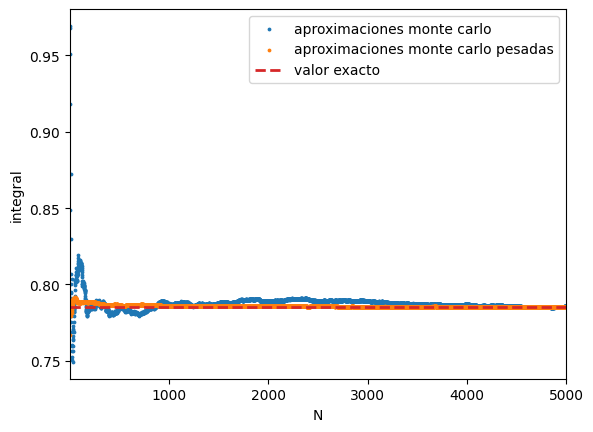

In [7]:
exacta = np.arctan(1)

nsteps = 5000

mc_steps = np.arange(1, nsteps)

mc = 0
aproximaciones_pesadas = []
for step in mc_steps:
    pesado = 2 - np.sqrt(4 - 3 * np.random.rand())
    peso = 3 / (4 - 2 * pesado)
    mc += peso / (1 + pesado**2)
    aproximaciones_pesadas.append(mc / step)
    
plt.scatter(mc_steps, aproximaciones, s=3, label="aproximaciones monte carlo")
plt.scatter(mc_steps, aproximaciones_pesadas, s=3, label="aproximaciones monte carlo pesadas")
plt.axhline(y=exacta, xmin=0, xmax=nsteps, color="tab:red", linewidth=2, linestyle="dashed", label="valor exacto")

plt.xlim((1, 5000))

plt.xlabel("N")
plt.ylabel("integral")
plt.legend()
plt.show()